# Question 4. How Do Casting Trends Vary Across Genres and Film Industries?

How do these casting trends vary across different genres and film industries, such as Hollywood compared to Bollywood? Are there differences in how actors are cast for similar archetypes in different cultural or geographic contexts? Comparing casting practices can highlight cultural influences on the film industry. 


In [1]:
# ignore
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from collections import Counter
from IPython import display
import matplotlib
import scipy.stats as sps
import matplotlib.patches as mpatches

pio.renderers.default='notebook'
plotly.offline.init_notebook_mode(connected=True)

font = {'size': 22}
matplotlib.rc('font', **font)

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
# ignore

def contains(x):
    if not isinstance(x, list):
        x = [x]
    return lambda i: any(j in i for j in x)

In [3]:
# ignore
actors_data = pd.read_csv('../../data/enriched/actors/actors_freebase.csv', low_memory=False, index_col=0)
character_data = pd.read_csv('../../data/MovieSummaries/character_processed.csv', low_memory=False, index_col=0)
archetypes_data = pd.read_csv('../../data/enriched/persona_identification/archetype_predictions_joined.csv', low_memory=False, index_col=0)
movies_data = pd.read_csv('../../data/MovieSummaries/movie_processed.csv', low_memory=False)

In [4]:
# ignore
actors_data

education  count_guest_roles  places_lived  spouses  children  \
0          False                  0             0        0         0   
1          False                  0             1        0         0   
2           True                 14             1        0         0   
3          False                 31             0        0         0   
4          False                  0             0        2         0   
...          ...                ...           ...      ...       ...   
57571      False                  0             1        0         0   
57572      False                  0             0        2         2   
57573      False                  0             0        0         3   
57574      False                  0             0        0         0   
57575      False                  0             0        1         0   

       professions_num                                        professions  \
0                    1                                          ['Actor']   
1                    5  ['Screenwriter', 'Comedian"-GB', 'Writer', 'Fi...   
2                    5  ['Voice acting"-GB', 'Actor', 'Comedian"-GB', ...   
3                    1                                          ['Actor']   
4                    1                                          ['Actor']   
...                ...                                                ...   
57571                1                                          ['Actor']   
57572                1                                          ['Actor']   
57573                3     ['Actor', 'Film director"-GB', 'Screenwriter']   
57574                1                                          ['Actor']   
57575                2                      ['Voice acting"-GB', 'Actor']   

      date_of_birth               nationality  gender  ...  \
0        1970-01-02                   Germany  Female  ...   
1        1960-02-27  United States of America  Female  ...   
2        1978-11-23            United Kingdom    Male  ...   
3        1912-10-30                   England    Male  ...   
4        1907-08-09  United States of America  Female  ...   
...             ...                       ...     ...  ...   
57571    1996-02-19  United States of America    Male  ...   
57572          1919                    Greece  Female  ...   
57573    1962-10-25                    France  Female  ...   
57574    1978-12-19                     India    Male  ...   
57575    1915-10-17                     Italy    Male  ...   

                                             discription          id  \
0                  Chris Hohenester is a German actress.  /m/0j50vrd   
1      Mary Joseph \"Mary Jo\" Pehl is an American wr...   /m/03xmr6   
2      Kayvan Novak is a British-Iranian actor, voice...   /m/0gwpbl   
3      Preston Lockwood was an English actor.\nHe is ...   /m/0ck5l5   
4      Marion Burns was an American film actress of t...  /m/02wbw52   
...                                                  ...         ...   
57571  Allen Alvarado is an American teen actor. He p...   /m/0bfwvk   
57572  Ilya Livykou or Ilia Livykou was a Greek actre...  /m/05f3dq5   
57573  Christine Citti is an actress, film director a...  /m/04p68qc   
57574                         Hiten Paintal is an actor.  /m/04gl2kv   
57575  Vittorio Sanipoli was an Italian stage, film a...  /m/0bf1lnm   

                            wiki_en_path      wiki_en_title  \
0                                    NaN                NaN   
1             /wikipedia/en/Mary_Jo_Pehl       Mary_Jo_Pehl   
2               /wikipedia/en_id/6912128       Kayvan_Novak   
3               /wikipedia/en_id/4724456   Preston_Lockwood   
4              /wikipedia/en_id/12532780       Marion_Burns   
...                                  ...                ...   
57571       /wikipedia/en/Allen_Alvarado     Allen_Alvarado   
57572          /wikipedia/en_id/21389123       Ilya_Livykou   
57573                                NaN

In [5]:
# ignore
archetypes_data

prediction               original_response  \
0                 Mentor / Wise Guide             Mentor / Wise Guide   
1      Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   
2      Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   
3                 Warrior / Vigilante             Warrior / Vigilante   
4                 Warrior / Vigilante             Warrior / Vigilante   
...                               ...                             ...   
87212                           Other                           Other   
87213                           Other                           Other   
87214      Sidekick / Loyal Companion      Sidekick / Loyal Companion   
87215      Sidekick / Loyal Companion      Sidekick / Loyal Companion   
87216  Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   

              character_name              movie_name movie_fb_id actor_fb_id  \
0                Umeko Tsuda                  Leonie  /m/05zr2p5   /m/0c7tjc   
1      '2-Gun' Gertie Baxter              Roxie Hart  /m/026l5ym   /m/049wny   
2            'A.J.' Furnival    The Groom Wore Spurs  /m/05nszz2    /m/0h7dd   
3               'Ace' Cooper         The Dude Bandit  /m/07s5z0d   /m/05ddzx   
4         'Baby Face' Martin                Dead End    /m/0gnrt    /m/03n6r   
...                      ...                     ...         ...         ...   
87212            Öregasszony                Cserepek  /m/064qw9w  /m/064n8zg   
87213             Østergaard              The Castle  /m/04q8y_g  /m/04n2_kz   
87214                  Şaban  Hababam Sınıfı Tatilde  /m/0g5rqxx   /m/02lbb_   
87215                  Şaban          Hababam sinifi  /m/02q9v9h   /m/02lbb_   
87216                  Şaban              Tosun Paşa  /m/02qf760   /m/02lbb_   

               model  
0      gpt-3.5-turbo  
1             gpt-4o  
2      gpt-3.5-turbo  
3      gpt-3.5-turbo  
4             gpt-4o  
...              ...  
87212         gpt-4o  
87213         gpt-4o  
87214         gpt-4o  
87215  gpt-3.5-turbo  
87216  gpt-3.5-turbo  

[87217 rows x 7 columns]

In [6]:
# ignore
movies_data

Wikipedia movie ID Freebase movie ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
81736            35228177        /m/0j7hxnt   
81737            34980460        /m/0g4pl34   
81738             9971909        /m/02pygw1   
81739              913762         /m/03pcrp   
81740            12476867        /m/02w7zz8   

                                              Movie name  \
0                                         Ghosts of Mars   
1      Getting Away with Murder: The JonBenét Ramsey ...   
2                                            Brun bitter   
3                                       White Of The Eye   
4                                      A Woman in Flames   
...                                                  ...   
81736                           Mermaids: The Body Found   
81737                                            Knuckle   
81738                                  Another Nice Mess   
81739  The Super Dimension Fortress Macross II: Lover...   
81740                                            Spliced   

       Movie box office revenue  Movie runtime      languages  \
0                    14010832.0           98.0    ['english']   
1                           NaN           95.0    ['english']   
2                           NaN           83.0  ['norwegian']   
3                           NaN          110.0    ['english']   
4                           NaN          106.0     ['german']   
...                         ...            ...            ...   
81736                       NaN          120.0    ['english']   
81737                       NaN           96.0    ['english']   
81738                       NaN           66.0    ['english']   
81739                       NaN          150.0   ['japanese']   
81740                       NaN           86.0    ['english']   

      movie_release_date                  countries_old  \
0             2001-08-24   ['United States of America']   
1             2000-02-16   ['United States of America']   
2             1988-01-01                     ['Norway']   
3             1987-01-01             ['United Kingdom']   
4             1983-01-01                    ['Germany']   
...                  ...                            ...   
81736         2011-03-19   ['United States of America']   
81737         2011-01-21  ['Ireland', 'United Kingdom']   
81738         1972-09-22   ['United States of America']   
81739         1992-05-21                      ['Japan']   
81740         2002-01-01                     ['Canada']   

                           countries  \
0       ['United States of America']   
1       ['United States of America']   
2                         ['Norway']   
3                 ['United Kingdom']   
4                        ['Germany']   
...                              ...   
81736   ['United States of America']   
81737  ['Ireland', 'United Kingdom']   
81738   ['United States of America']   
81739                      ['Japan']   
81740                     ['Canada']   

                                                  genres  
0      ['Adventure', 'Horror', 'Action', 'Thriller', ...  
1             ['Crime', 'Drama', 'Mystery', 'Biography']  
2                                     ['Crime', 'Drama']  
3                                 ['Erotic', 'Thriller']  
4                                              ['Drama']  
...                                                  ...  
81736                                          ['Drama']  
81737              ['Documentary', 'Drama', 'Biography']  
81738                               ['Comedy', 'Satire']  
81739  ['Drama', 'Adventure', 'Short Film', 'Cartoon'...  
81740                     ['Horror', 'Thriller', 'Teen']  

[81741 rows x 10 columns]

In [7]:
#ignore
character_data

Freebase movie ID              Character name Actor gender  \
Wikipedia movie ID                                                              
975900                     /m/03vyhn                    Akooshay            F   
975900                     /m/03vyhn  Lieutenant Melanie Ballard            F   
975900                     /m/03vyhn         Desolation Williams            M   
975900                     /m/03vyhn          Sgt Jericho Butler            M   
975900                     /m/03vyhn             Bashira Kincaid            F   
...                              ...                         ...          ...   
913762                     /m/03pcrp          UN Spacy Commander            M   
913762                     /m/03pcrp                 Silvie Gena            F   
913762                     /m/03pcrp                      Elensh            F   
913762                     /m/03pcrp                      Hibiki            M   
28308153                  /m/0cp05t9                         NaN            M   

                    Actor height (in meters) Actor ethnicity (Freebase ID)  \
Wikipedia movie ID                                                           
975900                                 1.620                           NaN   
975900                                 1.780                    /m/044038p   
975900                                 1.727                       /m/0x67   
975900                                 1.750                           NaN   
975900                                 1.650                           NaN   
...                                      ...                           ...   
913762                                   NaN                           NaN   
913762                                   NaN                           NaN   
913762                                   NaN                           NaN   
913762                                   NaN                           NaN   
28308153                               1.730                     /m/02w7gg   

                            Actor name Freebase character/actor map ID  \
Wikipedia movie ID                                                       
975900                  Wanda De Jesus                      /m/0bgchxw   
975900              Natasha Henstridge                       /m/0jys3m   
975900                        Ice Cube                       /m/0jys3g   
975900                   Jason Statham                      /m/02vchl6   
975900                     Clea DuVall                      /m/02vbb3r   
...                                ...                             ...   
913762                   Sonny Byrkett                      /m/0kr407w   
913762                   Susan Byrkett                      /m/0kr40b9   
913762              Dorothy Elias-Fahn                      /m/0kr406c   
913762                   Jonathan Fahn                      /m/0kr405_   
28308153                David Hemmings                      /m/0g8ngmc   

                   Freebase character ID Freebase actor ID  \
Wikipedia movie ID                                           
975900                        /m/0bgcj3x        /m/03wcfv7   
975900                        /m/0bgchn4         /m/0346l4   
975900                        /m/0bgchn_        /m/01vw26l   
975900                        /m/0bgchnq         /m/034hyc   
975900                        /m/0bgchp9         /m/01y9xg   
...                                  ...               ...   
913762                        /m/0kr407_         /m/0gn4bz   
913762                        /m/0kr40bf         /m/0gn4nd   
913762                        /m/0kr406h         /m/0b_vcv   
913762                        /m/0kr4090         /m/0bx7_j   
28308153                             NaN         /m/022g44   

                   actor_date_of_birth movie_release_date         ethn_name  \
Wikipedia movie ID                                                            
975900                

In [8]:
# ignore
actors_data = pd.merge(
    actors_data,
    character_data[['Freebase actor ID', 'ethn_name', 'race', 'actor_date_of_birth', 'Actor name']].drop_duplicates(),
    left_on=["id"],
    right_on=['Freebase actor ID'],
    how="left",
)
characters_data = pd.merge(
    archetypes_data[['prediction', 'character_name', 'movie_name', 'movie_fb_id', 'actor_fb_id']].rename(dict(prediction="archetype"), axis=1), 
    actors_data,
    how="inner",
    left_on=["actor_fb_id"], 
    right_on=["id"],
)
characters_data

archetype         character_name  \
0                 Mentor / Wise Guide            Umeko Tsuda   
1      Rogue / Trickster / Con Artist  '2-Gun' Gertie Baxter   
2      Rogue / Trickster / Con Artist        'A.J.' Furnival   
3                 Warrior / Vigilante           'Ace' Cooper   
4                 Warrior / Vigilante     'Baby Face' Martin   
...                               ...                    ...   
86939                           Other            Öregasszony   
86940                           Other             Østergaard   
86941      Sidekick / Loyal Companion                  Şaban   
86942      Sidekick / Loyal Companion                  Şaban   
86943  Rogue / Trickster / Con Artist                  Şaban   

                   movie_name movie_fb_id actor_fb_id  education  \
0                      Leonie  /m/05zr2p5   /m/0c7tjc      False   
1                  Roxie Hart  /m/026l5ym   /m/049wny      False   
2        The Groom Wore Spurs  /m/05nszz2    /m/0h7dd      False   
3             The Dude Bandit  /m/07s5z0d   /m/05ddzx      False   
4                    Dead End    /m/0gnrt    /m/03n6r       True   
...                       ...         ...         ...        ...   
86939                Cserepek  /m/064qw9w  /m/064n8zg      False   
86940              The Castle  /m/04q8y_g  /m/04n2_kz      False   
86941  Hababam Sınıfı Tatilde  /m/0g5rqxx   /m/02lbb_       True   
86942          Hababam sinifi  /m/02q9v9h   /m/02lbb_       True   
86943              Tosun Paşa  /m/02qf760   /m/02lbb_       True   

       count_guest_roles  places_lived  spouses  children  ...  wiki_en_id  \
0                      0             0        1         0  ...   4538715.0   
1                     14             0        3         0  ...   1141212.0   
2                     22             0        5         0  ...     64612.0   
3                      0             1        4         1  ...   1585014.0   
4                      7             3        4         2  ...     14045.0   
...                  ...           ...      ...       ...  ...         ...   
86939                  0             0        1         0  ...  23023729.0   
86940                  0             0        0         0  ...  19637850.0   
86941                  0             1        1         2  ...    523675.0   
86942                  0             1        1         2  ...    523675.0   
86943                  0             1        1         2  ...    523675.0   

      height           religion weight freebase_to_wiki_title  \
0      1.540                NaN    NaN           Mieko Harada   
1      1.630                NaN    NaN            Iris Adrian   
2      1.638  Christian Science    NaN          Ginger Rogers   
3      1.750                NaN    NaN            Hoot Gibson   
4      1.740   Episcopal Church    NaN        Humphrey Bogart   
...      ...                ...    ...                    ...   
86939    NaN                NaN    NaN            Irma Patkós   
86940    NaN                NaN    NaN            Bent Vejlby   
86941    NaN                NaN    NaN            Kemal Sunal   
86942    NaN                NaN    NaN            Kemal Sunal   
86943    NaN                NaN    NaN            Kemal Sunal   

      Freebase actor ID ethn_name      race actor_date_of_birth  \
0             /m/0c7tjc       NaN       NaN          1958-12-26   
1             /m/049wny       NaN       NaN          1912-05-29   
2              /m/0h7dd       NaN       NaN          1911-07-16   
3             /m/05ddzx       NaN       NaN          1892-08-06   
4              /m/03n6r     Dutch  European          1899-12-25   
...                 ...       ...       ...                 ...   
86939        /m/064n8zg       NaN       NaN          1900-03-08   
86940        /m/04n2_kz       NaN       NaN          1924-03-20   
86941         /m/02lbb_       NaN       NaN          1944-11-11   
86942         /m/02lbb_       NaN       NaN          1

In [9]:
# ignore
def load_list(x):
    if not isinstance(x, str):
        return None
    return list(json.loads(x.replace("'", '"')))


df = pd.merge(
    characters_data,
    movies_data,
    how="inner",
    left_on=["movie_fb_id"], 
    right_on=["Freebase movie ID"],
)
df['countries'] = df['countries'].map(load_list)
df['genres'] = df['genres'].map(load_list)
df

archetype         character_name  \
0                 Mentor / Wise Guide            Umeko Tsuda   
1      Rogue / Trickster / Con Artist  '2-Gun' Gertie Baxter   
2      Rogue / Trickster / Con Artist        'A.J.' Furnival   
3                 Warrior / Vigilante           'Ace' Cooper   
4                 Warrior / Vigilante     'Baby Face' Martin   
...                               ...                    ...   
86939                           Other            Öregasszony   
86940                           Other             Østergaard   
86941      Sidekick / Loyal Companion                  Şaban   
86942      Sidekick / Loyal Companion                  Şaban   
86943  Rogue / Trickster / Con Artist                  Şaban   

                   movie_name movie_fb_id actor_fb_id  education  \
0                      Leonie  /m/05zr2p5   /m/0c7tjc      False   
1                  Roxie Hart  /m/026l5ym   /m/049wny      False   
2        The Groom Wore Spurs  /m/05nszz2    /m/0h7dd      False   
3             The Dude Bandit  /m/07s5z0d   /m/05ddzx      False   
4                    Dead End    /m/0gnrt    /m/03n6r       True   
...                       ...         ...         ...        ...   
86939                Cserepek  /m/064qw9w  /m/064n8zg      False   
86940              The Castle  /m/04q8y_g  /m/04n2_kz      False   
86941  Hababam Sınıfı Tatilde  /m/0g5rqxx   /m/02lbb_       True   
86942          Hababam sinifi  /m/02q9v9h   /m/02lbb_       True   
86943              Tosun Paşa  /m/02qf760   /m/02lbb_       True   

       count_guest_roles  places_lived  spouses  children  ...  \
0                      0             0        1         0  ...   
1                     14             0        3         0  ...   
2                     22             0        5         0  ...   
3                      0             1        4         1  ...   
4                      7             3        4         2  ...   
...                  ...           ...      ...       ...  ...   
86939                  0             0        1         0  ...   
86940                  0             0        0         0  ...   
86941                  0             1        1         2  ...   
86942                  0             1        1         2  ...   
86943                  0             1        1         2  ...   

       Wikipedia movie ID Freebase movie ID              Movie name  \
0                22611767        /m/05zr2p5                  Leonie   
1                 7950950        /m/026l5ym              Roxie Hart   
2                33509255        /m/05nszz2    The Groom Wore Spurs   
3                24400406        /m/07s5z0d         The Dude Bandit   
4                   61525          /m/0gnrt                Dead End   
...                   ...               ...                     ...   
86939            23023687        /m/064qw9w                Cserepek   
86940            19802726        /m/04q8y_g              The Castle   
86941            30353952        /m/0g5rqxx  Hababam Sınıfı Tatilde   
86942            10376295        /m/02q9v9h          Hababam sinifi   
86943            10475102        /m/02qf760              Tosun Paşa   

      Movie box office revenue Movie runtime  \
0                          NaN           NaN   
1                          NaN          75.0   
2                          NaN          80.0   
3                          NaN          62.0   
4                          NaN          93.0   
...                        ...           ...   
86939                      NaN          91.0   
86940                      NaN          82.0   
86941                      NaN          90.0   
86942                      NaN          87.0   
86943                      NaN           NaN   

                                         languages movie_release_date  \
0      ['german', 'french', 'english', 'japanese']         2010-01-01   
1                                      ['english']         1942-02-20   


In [10]:
# ignore

all_countries = list()
for i, row in df.iterrows():
    if not isinstance(row.countries, list):
        continue
    all_countries += list(row.countries)

In [11]:
# hidecode
def histplot_limited(data, x_label="x_label", title="title", fig_kwargs=None, portion=0.005):
    fig_kwargs = fig_kwargs or {}
    counter = Counter(data)

    # Calculate the threshold for the least prevalent 10%
    total_count = sum(counter.values())
    threshold = total_count * 0.005
    
    other_count = 0
    filtered_counts = {}
    for string, count in counter.items():
        if count < threshold:
            other_count += count
        else:
            filtered_counts[string] = count
    
    # Plotting
    labels, values = zip(*filtered_counts.items())
    labels = sorted(labels, key=lambda x: filtered_counts[x], reverse=True)
    values = sorted(values, reverse=True)
    
    labels += ['Other']
    values += [other_count]
    
    fig = px.bar(
        x=labels,
        y=values,
        labels={
             "x": x_label,
             "y": "count",
         },
        text_auto=True,
        title=title,
        height=400,
        **fig_kwargs
    )
    
    return fig

In [12]:
# hidecode
fig = histplot_limited(all_countries, x_label="country", title="Movie country distribution")

fig.update_layout(
    font_size=18
)

display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

So, there are several large movie producing countries. We can compare just them. One of the most polar comparisons is USA vs India vs Japan. Let's see general archetypes distributions for them at first

In [13]:
# ignore
interesting_countries = [
    'United States of America',
    'India',
    'Japan',
    'United Kingdom',
]
filtered = df[df.countries.map(lambda x: len(x) > 0)].copy().explode('countries')
filtered['country'] = filtered.countries
filtered = filtered[filtered.country.isin(interesting_countries)].copy()[['country', 'archetype']]
                                        
fig = px.histogram(filtered, x='archetype', barmode='group', histnorm='probability density', height=500, title='Distribution of archetypes', text_auto=True,)
fig = fig.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
))
fig.update_layout(
    font_size=18
)

display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

In [14]:
# hidecode
fig = px.histogram(filtered, x='archetype', color='country', barmode='group', histnorm='percent', height=500, title='Distribution of archetypes by country', text_auto=True)
fig = fig.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    font_size=18
)
display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

Some of the most popular archetypes are Trickster, Romantic Partner, Mentor, and Caregiver. Let's analyze them one by one.

## How trickster image is different across cultures?

At first, let's look at gender: 

In [15]:
# hidecode
archetype = 'Rogue / Trickster / Con Artist'
df_filtered = df[(df.archetype == archetype)].explode('countries')
df_filtered = df_filtered[df_filtered.countries.isin(interesting_countries)]
df_filtered['country'] = df_filtered.countries

fig = go.Figure()
for country in df_filtered.country.unique()[:10]:
    fig.add_trace(
        go.Histogram(
            x=df_filtered[df_filtered.country == country].gender,
            histnorm='percent',
            name=country,
            texttemplate="%{y:.2f}%"
        ),
    )
fig = fig.update_xaxes(categoryorder="total descending")

fig.update_layout(
    title=f'Distribution of gender in "{archetype}" by country',
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    font_size=18
)

display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

Seems like there's no significant differnece between countries. Though, Japan has a bit higher portion of female con artists.

Let's look at the height differences. As mean height is different in every country, we will subtract mean height by country of movie. This way, we will compare "higher than mean" or "lower than mean" 

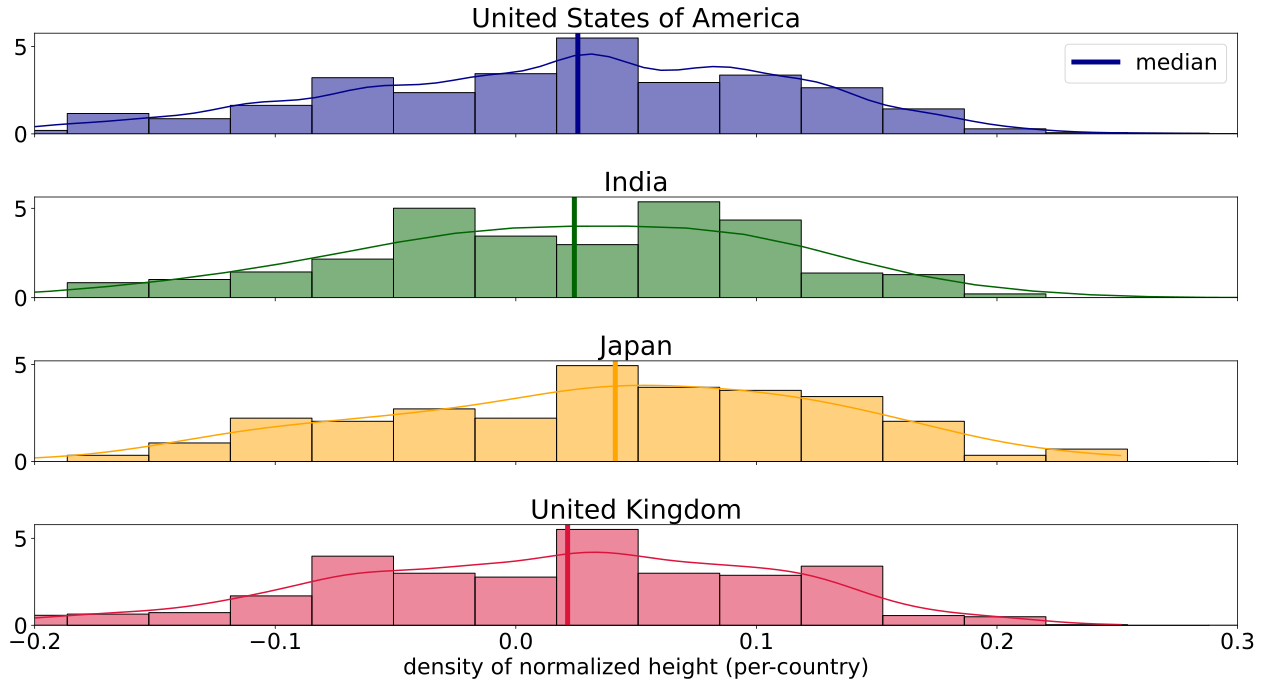

In [16]:
# hidecode
archetype = 'Rogue / Trickster / Con Artist'
df_filtered = df.explode('countries').rename(dict(countries="country"), axis=1)
df_filtered = df_filtered[df_filtered.country.isin(interesting_countries)]
mean_heights = df_filtered.groupby("country").height.mean()

filtered = df_filtered[(~df_filtered.height.isna()) & (df_filtered.archetype == archetype)].copy()
filtered['height_normalized'] = filtered.apply(lambda x: x['height'] - mean_heights[x.country], axis=1)

colors = ["darkblue", "darkgreen", "orange", 'crimson', 'gray']

fig, ax = plt.subplots(len(interesting_countries), figsize=(18, 10), sharex=True)
for i, (country, color) in enumerate(zip(interesting_countries, colors)):
    sns.histplot(filtered[filtered.country == country], x="height_normalized", bins=np.linspace(-1, 1, 60), ax=ax[i], stat='density', color=color, kde=True)
    ax[i].set_xlim((-0.2, 0.3))
    ax[i].axvline(np.median(filtered[filtered.country == country].height_normalized), label="median", linewidth=5, color=color)
    ax[i].set_title(country)
    ax[i].set_ylabel('')
    
ax[0].legend(loc='upper right')

plt.xlabel('density of normalized height (per-country)')
plt.tight_layout()

That's an interesting finding! While in all countries Tricksters are higher than the average actor of the corresponding country, in Japan this finding is the more noticeable. So, we can concludee that **in Japan movies Trickster charecters are higher than average actor by the magnitude biger than in India or USA**.

The difference between USA and India is not statistically significant. As well as the difference between Russia and USA.

In [17]:
stat = sps.ttest_ind(
    filtered[filtered.country == 'United States of America'].height_normalized,
    filtered[filtered.country == 'Japan'].height_normalized,
)
print(f"USA vs Japan statistic = {stat.statistic:.3f}, pvalue = {stat.pvalue:.4f}")
stat = sps.ttest_ind(
    filtered[filtered.country == 'United States of America'].height_normalized,
    filtered[filtered.country == 'India'].height_normalized,
)
print(f"USA vs India statistic = {stat.statistic:.3f}, pvalue = {stat.pvalue:.4f}")

USA vs Japan statistic = -2.789, pvalue = 0.0053
USA vs India statistic = -1.914, pvalue = 0.0556


The prominence of taller actors playing trickster roles in Japan may be linked to cultural associations between height and status. In Japanese culture, height often symbolizes superiority, authority, or being "above" others, which denotes both physical tallness and higher stature in terms of value or rank. Tricksters in Japanese folklore, such as the Tengu or Kitsune, are often depicted as figures of power and cunning, blending mischief with a commanding presence. Height could amplify this perception of dominance and charisma, making taller actors more fitting for these roles. Additionally, societal admiration for height as "cool" may further elevate the appeal of such portrayals. This contrasts with other cultures where tricksters are less tied to physical stature and more associated with wit or humor alone

In [18]:
# hidecode
def histplot_limited(data, x_label="x_label", title="title", fig_kwargs=None, portion=0.005, ax=None):
    fig_kwargs = fig_kwargs or {}

    # Calculate the threshold for the least prevalent 10%
    total_count = sum(data.values())
    threshold = total_count * portion
    
    other_count = 0
    filtered_counts = {}
    for string, count in data.items():
        if count < threshold:
            other_count += count
        else:
            filtered_counts[string] = count / total_count
    
    # Plotting
    labels, values = zip(*filtered_counts.items())
    labels = sorted(labels, key=lambda x: filtered_counts[x], reverse=True)
    values = sorted(values, reverse=True)

    if other_count > 0:
        labels += ['Other']
        values += [other_count / total_count]
    
    sns.barplot(
        x=labels,
        y=values,
        ax=ax,
        **fig_kwargs
    )

Are there any interesting differences in race?

Yes!

Again, to address different distributions of races in every country's actors, we will compute portion of tricksters for every race normalized by total actors race presence in country's movies. 

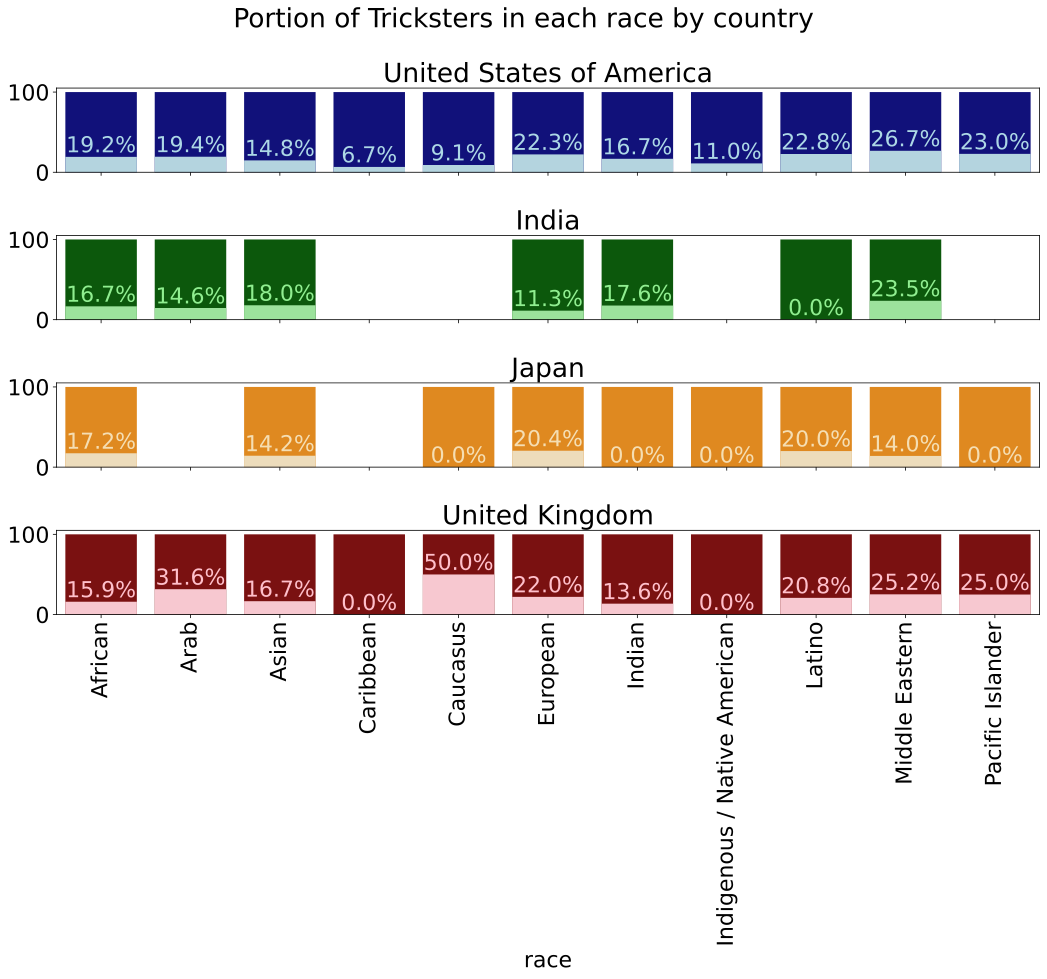

In [19]:
# hidecode
colors = [
    ("darkblue", "lightblue"), 
    ("darkgreen", "lightgreen"), 
    ("darkorange", "wheat"), 
    ("darkred", "pink"), 
    ("darkgray", "lightgray"), 
]
archetype = 'Rogue / Trickster / Con Artist'

fig, axes = plt.subplots(len(interesting_countries), 1, figsize=(15, 14), sharex=True)

df_filtered = df.explode('countries').rename(dict(countries="country"), axis=1)
df_filtered = df_filtered[df_filtered.country.isin(interesting_countries)]

for ax, country, (color_d, color_l) in zip(axes, interesting_countries, colors):
    filtered = df_filtered[(~df_filtered.race.isna()) & (df_filtered.country == country)].copy()
    
    total = filtered.groupby('race')['archetype'].count()
    con = filtered[filtered.archetype == archetype].groupby('race')['archetype'].count()

    total.drop('Mixed', inplace=True, errors='ignore')
    con.drop('Mixed', inplace=True, errors='ignore')
    
    con = con / total * 100
    con.fillna(0, inplace=True)
    total[:] = 100
    
    bar1 = sns.barplot(x="race",  y="archetype", data=total.reset_index(), color=color_d, ax=ax)
    bar2 = sns.barplot(x="race", y="archetype", data=con.reset_index(), color=color_l, ax=ax, )
    bar2.bar_label(bar2.containers[1], labels=con.map(lambda x: f"{x:.1f}%"), label_type='edge', padding=0, color=color_l)
    
    # add legend
    top_bar = mpatches.Patch(color=color_d, label='non-trickster')
    bottom_bar = mpatches.Patch(color=color_l, label='trickster')
    ax.tick_params(axis='x', labelrotation=90)
    ax.tick_params(axis='y', labelrotation=0)
    ax.set_ylabel('')
    ax.set_title(country)

plt.suptitle("Portion of Tricksters in each race by country")
plt.tight_layout()

Interesting observation is not what present, but what is not here. In Japan there were no entries of Caucasus, Indian, Native American, and Pacific Islander. Interesting how there were no Latino entries for India.

Also, UK is very different by casting Arab and Caucasus as tricksters relatively more frequently than in other countries

Let's analyze a different archetype.

## How "Love Interest / Romantic Partner" vary?

In [20]:
# hidecode
archetype = 'Love Interest / Romantic Partner'
df_filtered = df[(df.archetype == archetype) & (~df.gender.isna())].explode('countries')
df_filtered = df_filtered[df_filtered.countries.isin(interesting_countries)]
df_filtered['country'] = df_filtered.countries

fig = px.histogram(
    df_filtered,
    x='gender',
    color='country',
    barmode='group',
    histnorm='probability density',
    height=400,
    title=f'Distribution of gender in "{archetype}" by country',
    text_auto=True,
)
fig = fig.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    font_size=18
)

display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

In [21]:
df_filtered['male_indicator'] = (df_filtered.gender == "Male").map(int)
mean_by_country = df[(~df.gender.isna())].explode('countries').copy()
mean_by_country['male_indicator'] = (mean_by_country.gender == "Male").map(int)
mean_by_country = mean_by_country.groupby('countries').male_indicator.mean()

stat = sps.ttest_ind(
    df_filtered[df_filtered.country == 'United States of America'].male_indicator - mean_by_country['United States of America'],
    df_filtered[df_filtered.country == 'India'].male_indicator - mean_by_country['India'],
)
print(f"USA vs India statistic = {stat.statistic:.3f}, pvalue = {stat.pvalue:.4f}")
stat = sps.ttest_ind(
    df_filtered[df_filtered.country == 'United States of America'].male_indicator - mean_by_country['United States of America'],
    df_filtered[df_filtered.country == 'Japan'].male_indicator - mean_by_country['Japan'],
)
print(f"USA vs Japan statistic = {stat.statistic:.3f}, pvalue = {stat.pvalue:.4f}")

USA vs India statistic = -6.816, pvalue = 0.0000
USA vs Japan statistic = -1.322, pvalue = 0.1861


Here, females prevail, and India has higher portion of males statistically significantly, the conducted ttest accounted for the base distribution of male / female in the country. That's quite a funny fact.

## General Observations

Now, let's move on from cherry-picks to general observations

In [22]:
# ignore
def draw_3d_rectangle(min_corner, max_corner, color='blue', opacity=0.5):
    # Unpack the corners
    x_min, y_min, z_min = min_corner
    x_max, y_max, z_max = max_corner

    # Define the vertices of the rectangular prism
    x = [x_min, x_max, x_max, x_min, x_min, x_max, x_max, x_min]
    y = [y_min, y_min, y_max, y_max, y_min, y_min, y_max, y_max]
    z = [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max]

    # Define the faces using vertex indices
    triangles = [
        [0, 1, 3], [1, 2, 3],  # Bottom
        [4, 5, 7], [5, 6, 7],  # Top
        [0, 1, 4], [1, 5, 4],  # Front
        [1, 2, 5], [2, 6, 5],  # Right
        [2, 3, 6], [3, 7, 6],  # Back
        [3, 0, 7], [0, 4, 7]   # Left
    ]
    i = [el[0] for el in triangles]
    j = [el[1] for el in triangles]
    k = [el[2] for el in triangles]

    # Create the Mesh3d object
    return go.Mesh3d(
        x=x, y=y, z=z,
        i=i, j=j, k=k,
        color=color,
        opacity=opacity
    )


def normalize_1d(arr):
    return arr/(arr.sum() + 1e-7)


def find_percentiles(data, col, num_bins):
    '''
    When data is continuous, we need to discretize it into bins.
    '''
    # calculate the percentiles
    data_no_nan = data[[col]].dropna()
    percentiles = np.quantile(data_no_nan[col], [i/num_bins for i in range(num_bins + 1)])
    # adjust them a little bit
    percentiles[0] -= 0.01
    percentiles[-1] += 0.01
    # discretize the data
    data_no_nan[col + "_bin"] = np.digitize(data_no_nan[col], percentiles)
    col = col + "_bin"
    # change the ticks name
    ticks_name = [f"[{percentiles[i - 1]:.2f}, {percentiles[i]:.2f}]" for i in range(1, len(percentiles))]
    data_no_nan[col] = data_no_nan[col].apply(lambda x: ticks_name[x - 1])

    # merge the data back, and rename nans
    if sum(data[col].isna()) > 0:
        ticks_name = ticks_name + ["nan"]
    data.loc[~data[col].isna(), col] = data_no_nan[col]
    data[col].fillna("Other", inplace=True)

    return col, data_no_nan


def remove_nans(data, col):
    data.loc[data[col].isna(), col] = "Other"
    return col, data
    
def ttest_bernoulli_ind(
        theta1, theta2, 
        num1, num2,
        mht=False, alpha=0.05
    ):
    ''' 
    theta1: shape (n1, n2) probabilities
    theta2: shape (n1, n2) probabilities
    num1: shape (n1, n2) of numbers of samples for the first group
    num2: shape (n1, n2) of numbers of samples for the second group
    '''

    std = np.sqrt(theta1 * (1 - theta1)/num1 + theta2 * (1 - theta2)/num2)
    ZZZ_score = (theta1 - theta2)/std
    p_value = 2 * sps.norm.sf(np.absolute(ZZZ_score))
    if mht:
        p_value = np.minimum(1.0, p_value * num1.size)
    return (p_value <= alpha)


def add_column_other(data, col, num_bins):
    '''
    When the number of columns is too high then we need to drop some values
    and write them as "Other"
    '''
    # calculate the appearance of each value and sort by decreasing order
    vc = data[col].value_counts().reset_index().sort_values(by="count", ascending=False)
    # take top and bottom values
    top_num = set(vc[col].values[:num_bins])
    bottom_num = set(vc[col].values[num_bins:])
    # create a function that will rename the values
    # it might be faster to use a the first or the second
    if len(top_num) < len(bottom_num):
        rename_to_other = lambda x: x if x in top_num else "Other"
    else:
        rename_to_other = lambda x: x if not x in bottom_num else "Other"
    # rename the values
    data[col + "_other"] = data[col].apply(rename_to_other)
    col = col + "_other"
    return col, data


def calculate_ticks_and_norm(
        data, 
        xcol, ycol, 
        num_xbins=10, num_ybins=10, 
        normalize="first", 
        compare_default_value="none",
        alpha=0.05,
        mht=False,
):
    '''

    parameters:
    - xcol: str 
        which column would be on x axis
    - ycol: str 
        which column would be on y axis
    - num_xbins: int=10
        number of bins for x axis
    - num_ybins: int=10 
        number of bins for y axis
    - normalize: "first" | "second" | "both" | "none"="first", 
        how to normalize the data
    - compare_default_value: "none" | "divide" | "subtract" = "none
        We want to look at how "abnormal" the data is if we look at the distribution with the fixed ycol or xcol
        If True, then we will normalize the data by the sum of the non-normalized column
    '''
    # drop the rows with missing values
    data_part = data[[xcol, ycol]].copy()
    
    # if the data is not categorical, then we need to discretize it
    if data_part[xcol].dtype != "object":
        xcol, data_part = find_percentiles(data_part, xcol, num_xbins)
    else:
        xcol, data_part = remove_nans(data_part, xcol)

    if data_part[ycol].dtype != "object":
        ycol, data_part = find_percentiles(data_part, ycol, num_ybins)
    else:
        ycol, data_part = remove_nans(data_part, ycol)

    # if the number of unique values is too high, then we need to drop some of them
    if len(data_part[xcol].unique()) > num_xbins + 1:
        xcol, data_part = add_column_other(data_part, xcol, num_xbins)
    if len(data_part[ycol].unique()) > num_ybins + 1:
        ycol, data_part = add_column_other(data_part, ycol, num_ybins)

    xticks_name = data_part[xcol].unique()
    yticks_name = data_part[ycol].unique()
    
    # calculate the appearance of each bin
    occurences = data_part[[xcol, ycol]].value_counts().reset_index(name="cnt")
    label2index_x = {label: i for i, label in enumerate(data_part[xcol].unique())}
    label2index_y = {label: i for i, label in enumerate(data_part[ycol].unique())}

    # fill the grid with those values
    grid = np.zeros((len(label2index_y), len(label2index_x)), dtype=float)
    for i, row in occurences.iterrows():
        grid[label2index_y[row[ycol]], label2index_x[row[xcol]]] = row["cnt"]
    
    # maybe normalize the grid
    # (this is a little bit tricky)
    if normalize == "first":
        # normalize each column
        first_part = grid / grid.sum(axis=0).reshape(1, -1)
    elif normalize == "second":
        # normalize each row
        first_part = grid / grid.sum(axis=1).reshape(-1, 1)
    elif normalize == "both":
        first_part = grid / grid.sum()
    else:
        first_part = grid

    if normalize == "first":
        # normalize column which is sum of rows
        second_part = normalize_1d(grid.sum(axis=1)).reshape(-1, 1)
    elif normalize == "second":
        # normalize row which is sum of colums
        second_part = normalize_1d(grid.sum(axis=0)).reshape(1, -1)

    ret_grid = first_part
    # compare the results with the original distribution
    if compare_default_value != "none":
        if compare_default_value == "divide":
            ret_grid = first_part / second_part
        elif compare_default_value == "subtract":
            ret_grid = first_part - second_part
        else:
            raise RuntimeError("Unknown value for compare_default_value")

    # calculate statistical meaningfulness
    if normalize == "first":
        num1 = grid.sum(axis=0).reshape(1, -1)
        num2 = grid.sum()
        ttest_result = ttest_bernoulli_ind(first_part, second_part, num1, num2, alpha=alpha, mht=mht)
    elif normalize == "second":
        num1 = grid.sum(axis=1).reshape(-1, 1)
        num2 = grid.sum()
        ttest_result = ttest_bernoulli_ind(first_part, second_part, num1, num2, alpha=alpha, mht=mht)
    else:
        ttest_result = None

    return ret_grid, ttest_result, xticks_name, yticks_name, label2index_x, label2index_y, [occurences]


def histogram_3d_plotly(
        data, 
        xcol, ycol, title, 
        num_xbins=10, num_ybins=10, 
        normalize="first", 
        compare_default_value="none", 
        gap=0.01,
        alpha=0.05,
        mht=False,
    ):
    '''
    # Example of usage:
    fig = histogram_3d_plotly(data, "race", "archetype", "test", normalize="y", gap=0.1)
    fig.update_layout(
        width=800,
        height=800,
    )
    fig.show()
    '''
    grid, xticks_name, yticks_name, label2index_x, label2index_y, _ = \
        calculate_ticks_and_norm(
            data=data, 
            xcol=xcol, ycol=ycol, 
            num_xbins=num_xbins, num_ybins=num_ybins, 
            normalize=normalize, compare_default_value=compare_default_value,
            alpha=alpha,
            mht=mht,
        )

    # create the histogram
    fig = go.Figure()
    for i in range(num_xbins):
        for j in range(num_ybins):
            fig.add_trace(draw_3d_rectangle(
                (i + gap/2, j + gap/2, 0),
                (i + 1 - gap/2, j + 1 - gap/2, grid[i, j]),
                color='blue',
                opacity=1.0
            ))
    # add titles
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                ticktext=xticks_name,
                tickvals=[i + 0.5 for i in range(len(label2index_x))],
                tickmode="array",
                title=xcol
            ),
            yaxis=dict(
                ticktext=yticks_name,
                tickvals=[i + 0.5 for i in range(len(label2index_y))],
                tickmode="array",
                title=ycol
            ),
        ),
        title=dict(
            text=title,
            x=0.5
        )
    )
    return fig

def plot_2d_heatmap(
        data, 
        xcol, ycol, 
        num_xbins=10, num_ybins=10, 
        normalize="first", compare_default_value="none", 
        percentage=True,
        alpha=0.05,
        mht=True,
    ):
    grid, ttest_result, xticks_name, yticks_name, label2index_x, label2index_y, to_debug = calculate_ticks_and_norm(
        data=data, 
        xcol=xcol, ycol=ycol, 
        num_xbins=num_xbins, num_ybins=num_ybins, 
        normalize=normalize,
        compare_default_value=compare_default_value,
        alpha=alpha,
        mht=mht
    )

    if compare_default_value == "none":
        center = None
    elif compare_default_value == "divide":
        center = 1
    elif compare_default_value == "subtract":
        center = 0
    else:
        raise RuntimeError("Unknown value for compare_default_value")

    if percentage:
        grid = grid * 100

    if ttest_result is not None:
        grid[~ttest_result] = 0.0

    sns.heatmap(
        grid, 
        xticklabels=xticks_name, 
        yticklabels=yticks_name,
        center=center,
        annot=True,
        fmt=".0f",
        square=True,
        cbar=False,
    )

    return grid, to_debug

On the heatmap normalized for each contry we see that India really loves a lot of roles with Love Interest. At the same time, Netherlands mannaged to confuse our archetype inference pipeline the most. Hong Kong loves featuring Warriors 

Non-significant values are turned to 0

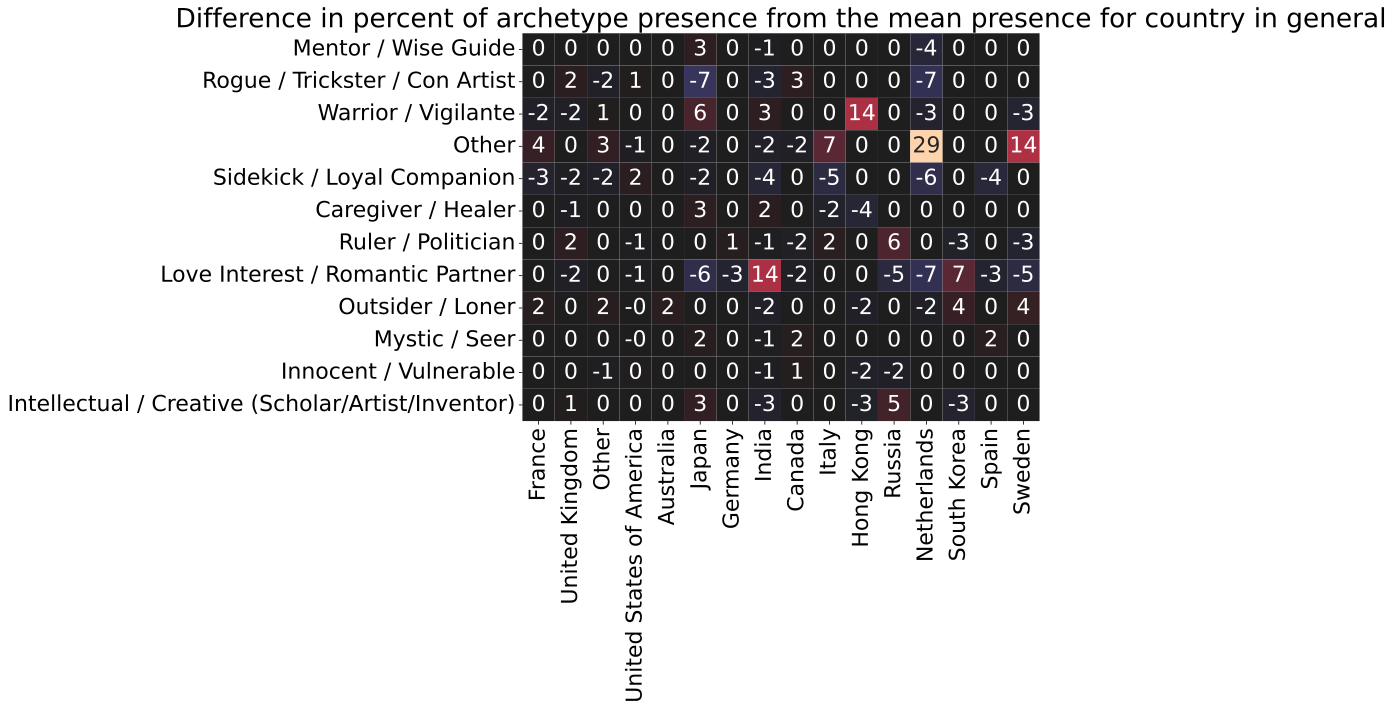

In [23]:
# hidecode
df_filtered = df.explode('countries').rename(dict(countries="country"), axis=1)

plt.figure(figsize=(15, 15))
plot_2d_heatmap(df_filtered, 'country', 'archetype', num_xbins=16, num_ybins=100, compare_default_value='subtract')
plt.title("Difference in percent of archetype presence from the mean presence for country in general")
plt.tight_layout()
None

If we look at Other archetypes in Netherlands, we can see that most of such cases are silent movies. Indeed, it's hard to analyse characters archetypes in such movies

In [24]:
# hidecode
df_filtered[(df_filtered.country == 'Netherlands') & (df_filtered.archetype == 'Other')][['character_name', 'movie_name', 'country', 'genres']].explode('genres').genres.value_counts().head(5)

genres
Silent     161
Drama      150
Classic     62
Comedy      60
Crime       28
Name: count, dtype: int64

After taking look at the general picture again, it's interesting to know if, for example, actors casted for "Love Interest" differ for Romance and Comedy movies

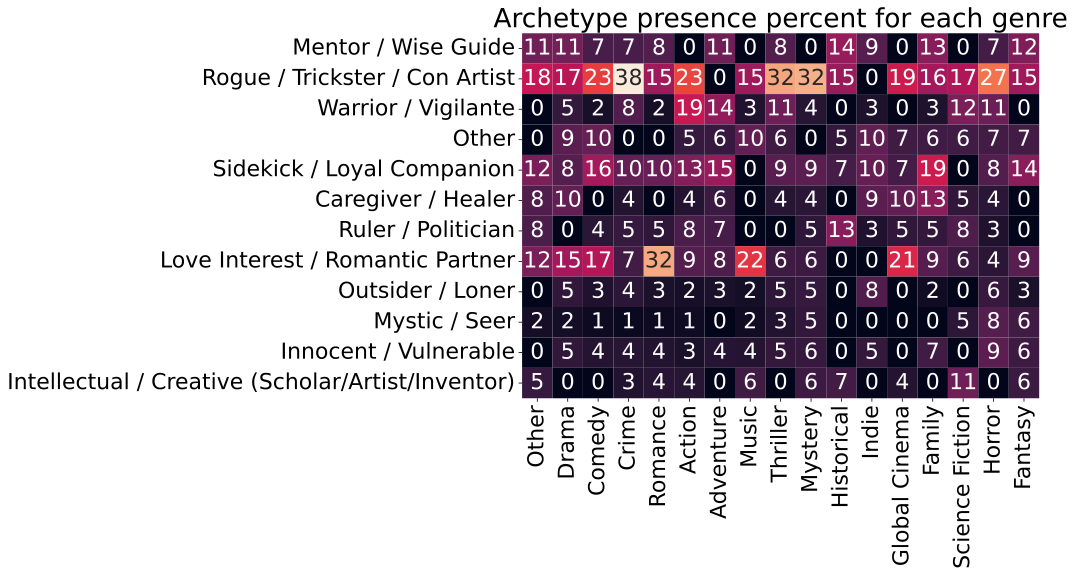

In [25]:
# hidecode
df_filtered = df.explode('genres').rename(dict(genres="genre"), axis=1)

plt.figure(figsize=(15, 15))
plot_2d_heatmap(df_filtered, 'genre', 'archetype', num_xbins=16, num_ybins=100)
plt.title("Archetype presence percent for each genre")
plt.tight_layout()
None

We may see that in comedy movies love interest is more likely to be a female than in romance movies

In [26]:
# hidecode
archetype = 'Love Interest / Romantic Partner'
df_filtered = df[(df.archetype == archetype) & (~df.gender.isna())]
df_filtered = df_filtered.explode('genres').rename(dict(genres="genre"), axis=1)
df_filtered = df_filtered[df_filtered.genre.isin(['Romance', 'Comedy'])]

fig = px.histogram(
    df_filtered,
    x='gender',
    color='genre',
    barmode='group',
    histnorm='probability density',
    height=400,
    title=f'Distribution of gender in "{archetype}" by gender',
    text_auto=True,
)
fig = fig.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    font_size=18
)

display.display_html(fig.to_html(full_html=False, include_plotlyjs='cdn'), raw=True)

## Conclusion

Indeed, we can see that casting trends vary across different genres and film industries, showing cultural and genre influence on casting choices. Some of the interesting cherry-picks are:

- In Japan movies trickster charecters' actors are higher than average actor compared to actors of India or USA
- In Japan there were no entries of Caucasus, Indian, Native American, and Pacific Islander as trickster-playing actors. Also, there were no Latino entries for India
- UK is very different from other countries by casting Arab and Caucasus as tricksters relatively more frequently
- India has higher portion of males playing "Love Interest" roles than in other countries
- Comedy movies love interest actor is more likely to be a female than in romance movies